<a href="https://colab.research.google.com/github/LEFT-BEE/KMU-Algorithm/blob/master/%EB%8D%B0%EC%9D%B4%ED%84%B0%EA%B3%BC%ED%95%99/homework2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Pytorch로 Logistic Regression 구현

In [171]:
import torch 

x_train = torch.FloatTensor([[1],[2],[3],[4],[5],[2.5],[3.5],[0],[3.1],[2.7],[2.8],[2.9]])
y_train = torch.FloatTensor([[1],[1],[1],[0],[0],[0],[0],[1],[0],[1],[1],[1]])

In [172]:
W = torch.zeros(1,1)
b = torch.zeros(1,1)

lr = 1.0

In [173]:
for epoch in range(3001):
  W.requires_grad_(True)
  b.requires_grad_(True)

  hypothesis = torch.sigmoid(torch.mm(x_train , W)+b)
  cost = torch.mean(-y_train * torch.log(hypothesis)-(1 - y_train) * torch.log(1 - hypothesis))

  cost.backward()
  with torch.no_grad() as grd:
    W = W - lr*W.grad
    b = b - lr*b.grad
  if epoch % 100 == 0:
    print( 'epoch: {}, cost: {:.6f}, W: {:.6f}, b: {:.6f}'.format(epoch,cost,W.squeeze(),b.item()))

epoch: 0, cost: 0.693147, W: -0.154167, b: 0.083333
epoch: 100, cost: 0.420221, W: -1.451281, b: 4.406925
epoch: 200, cost: 0.398721, W: -1.898433, b: 5.773750
epoch: 300, cost: 0.390820, W: -2.174322, b: 6.609553
epoch: 400, cost: 0.387009, W: -2.367329, b: 7.191599
epoch: 500, cost: 0.384924, W: -2.510626, b: 7.622530
epoch: 600, cost: 0.383699, W: -2.620779, b: 7.953164
epoch: 700, cost: 0.382944, W: -2.707397, b: 8.212804
epoch: 800, cost: 0.382463, W: -2.776597, b: 8.420023
epoch: 900, cost: 0.382149, W: -2.832521, b: 8.587363
epoch: 1000, cost: 0.381941, W: -2.878112, b: 8.723699
epoch: 1100, cost: 0.381801, W: -2.915530, b: 8.835541
epoch: 1200, cost: 0.381706, W: -2.946401, b: 8.927779
epoch: 1300, cost: 0.381641, W: -2.971979, b: 9.004180
epoch: 1400, cost: 0.381596, W: -2.993242, b: 9.067673
epoch: 1500, cost: 0.381565, W: -3.010968, b: 9.120598
epoch: 1600, cost: 0.381543, W: -3.025776, b: 9.164800
epoch: 1700, cost: 0.381528, W: -3.038172, b: 9.201797
epoch: 1800, cost: 0.3

In [174]:
x_test = torch.FloatTensor([[4.5] , [1.1]])
test_result = torch.sigmoid(torch.mm(x_test , W)+b)
print(torch.round(test_result))

tensor([[0.],
        [1.]])


## Matplot으로 결과 시각화

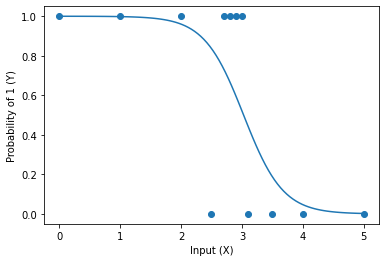

In [155]:
import matplotlib.pyplot as plt
W.requires_grad_(False)
b.requires_grad_(False)
plt.scatter(x_train, y_train)
X = torch.linspace(0,5,100).unsqueeze(1)
plt.ylabel("Probability of 1 (Y)")
plt.xlabel("Input (X)")
Y = torch.sigmoid(torch.mm(X,W)+b)
plt.plot(X,Y)
plt.show()

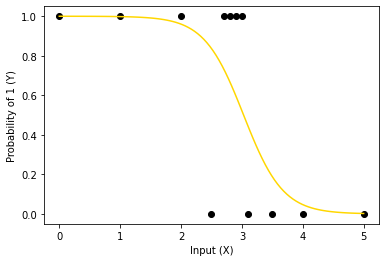

In [156]:
import matplotlib.pyplot as plt
W.requires_grad_(False)
b.requires_grad_(False)
plt.scatter(x_train, y_train,c = "black")
X = torch.linspace(0,5,100).unsqueeze(1)
plt.ylabel("Probability of 1 (Y)")
plt.xlabel("Input (X)")
Y = torch.sigmoid(torch.mm(X,W)+b)
plt.plot(X,Y,c="gold")
plt.show()

## 여러가지 optimzier 사용해보기


In [224]:
sgd = torch.optim.SGD([W,b] , lr = 1.0)
adam = torch.optim.Adam([W,b], lr=1.0)
adadelta = torch.optim.Adadelta([W,b])
adagrad = torch.optim.Adagrad([W,b])
rmsprop = torch.optim.RMSprop([W,b])


In [218]:
W = torch.rand(1,1)
b = torch.rand(1,1)
optimizer = torch.optim.SGD([W,b], lr=1.0)

for epoch in range(3001):
    W.requires_grad_(True)
    b.requires_grad_(True)

    hypothesis = torch.sigmoid(torch.mm(x_train , W)+b)
    cost = torch.mean(-y_train * torch.log(hypothesis)-(1 - y_train) * torch.log(1 - hypothesis))
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
  
    if epoch % 1000 == 0:
      print( 'epoch: {}, cost: {:.6f}, W: {:.6f}, b: {:.6f}'.format(epoch,cost,W.squeeze(),b.item()))

epoch: 0, cost: 1.455011, W: -0.727319, b: 0.625422
epoch: 1000, cost: 0.381931, W: -2.880697, b: 8.731426
epoch: 2000, cost: 0.381504, W: -3.065026, b: 9.281929
epoch: 3000, cost: 0.381491, W: -3.096739, b: 9.376535


In [232]:
W = torch.rand(1,1)
b = torch.rand(1,1)
optimizer = torch.optim.Adam([W,b], lr=1.0)
for epoch in range(3001):
    W.requires_grad_(True)
    b.requires_grad_(True)

    hypothesis = torch.sigmoid(torch.mm(x_train , W)+b)
    cost = torch.mean(-y_train * torch.log(hypothesis)-(1 - y_train) * torch.log(1 - hypothesis))
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
  
    if epoch % 1000 == 0:
      print( 'epoch: {}, cost: {:.6f}, W: {:.6f}, b: {:.6f}'.format(epoch,cost,W.squeeze(),b.item()))

epoch: 0, cost: 0.831319, W: -0.774079, b: -0.560511
epoch: 1000, cost: 0.381491, W: -3.103853, b: 9.397754
epoch: 2000, cost: 0.381491, W: -3.103853, b: 9.397754
epoch: 3000, cost: 0.381491, W: -3.103853, b: 9.397752


In [234]:
W = torch.rand(1,1)
b = torch.rand(1,1)
optimizer = torch.optim.RMSprop([W,b])


for epoch in range(3001):
    W.requires_grad_(True)
    b.requires_grad_(True)

    hypothesis = torch.sigmoid(torch.mm(x_train , W)+b)
    cost = torch.mean(-y_train * torch.log(hypothesis)-(1 - y_train) * torch.log(1 - hypothesis))
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
  
    if epoch % 1000 == 0:
      print( 'epoch: {}, cost: {:.6f}, W: {:.6f}, b: {:.6f}'.format(epoch,cost,W.squeeze(),b.item()))

epoch: 0, cost: 0.864706, W: 0.052481, b: 0.887583
epoch: 1000, cost: 0.383022, W: -2.702240, b: 8.186323
epoch: 2000, cost: 0.381516, W: -3.107091, b: 9.387453
epoch: 3000, cost: 0.381516, W: -3.109075, b: 9.393414


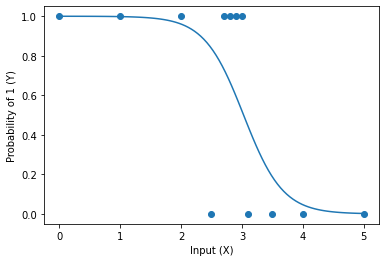

In [233]:
import matplotlib.pyplot as plt
W.requires_grad_(False)
b.requires_grad_(False)
plt.scatter(x_train, y_train)
plt.ylabel("Probability of 1 (Y)")
plt.xlabel("Input (X)")
X = torch.linspace(0,5,100).unsqueeze(1)
Y = torch.sigmoid(torch.mm(X,W)+b)
plt.plot(X,Y)
plt.show()

## Logistic Regression with sklearn

In [161]:
import numpy as np
from sklearn.linear_model import LogisticRegression
x_train = [[1],[2],[3],[4],[5],[2.5],[3.5],[0],[3.1],[2.7],[2.8],[2.9]]
y_train = [1,1,1,0,0,0,0,1,0,1,1,1] 
model = LogisticRegression(penalty='none') 
model.fit(x_train, y_train)

print(model.coef_, model.intercept_)

x_test = [[i] for i in np.linspace(0,5,100)]
test_result = model.predict(x_test)
print(test_result)


[[-3.10385806]] [9.39776831]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [162]:
 def sigmoid(x):
    return 1 / (1 +np.exp(-x))

(-0.1, 1.1)

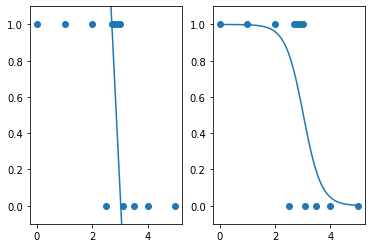

In [163]:
plt.subplot(1, 2, 1) 
plt.scatter(x_train,y_train)
plt.plot(x_test, x_test * model.coef_ + model.intercept_)
plt.ylim(-0.1,1.1)

plt.subplot(1, 2, 2) 
plt.scatter(x_train,y_train)
plt.plot(x_test, sigmoid(x_test * model.coef_ + model.intercept_))
plt.ylim(-0.1,1.1)